<a href="https://colab.research.google.com/github/kingy0ujin/2024-1-my-BDA/blob/main/inhome/ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# 필요한 csv 파일 교수님 깃허브에서 가져오기

!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.38 MiB/s, done.


# 07 데이터 정제 - 빠진 데이터, 이상한 데이터 제거하기

## 07-1 빠진 데이터를 찾아라! - 결측치를 정제하기
- 결측치(missing value) : 누락된 값, 비어있는 값
- 결측치 -> 함수 적용 x, 분석 결과 왜곡

### 결측치 찾기
- 결측치 만들기 -> NumPy 패키지의 np.nan 입력
- 결측치 확인하기 -> pd.isna() 이용하면 데이터에 결측치가 있는지 확인 가능, 괄호 안에 데이터 프레임 명 입력 -> 결과는 True, False

In [1]:
# 결측치 만들기
import pandas as pd
import numpy as np

df = pd.DataFrame({'sex' : ['M','F',np.nan,'M','F'],
                   'score' : [5,4,3,4, np.nan]})
df

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0
4,F,NaN


In [3]:
df['score'] + 1 # 결측치가 있는 상태로 연산 -> 결과도 NaN

0    6.0
1    5.0
2    4.0
3    5.0
4    NaN
Name: score, dtype: float64

In [4]:
pd.isna(df)

,sex,score
0,False,False
1,False,False
2,True,False
3,False,False
4,False,True


In [6]:
# pd.isna().sum() -> 결측치의 총 개수 출력
pd.isna(df).sum()

sex      1
score    1
dtype: int64

### 결측치 제거하기
- 결측치 있는 행 제거 : df.dropna()이용, df.dropna(subset = ['변수명'])

In [7]:
df.dropna(subset = ['score']) # score 변수에 있는 결측치의 행 제거

,sex,score
0,M,5.0
1,F,4.0
2,NaN,3.0
3,M,4.0


In [8]:
df_nomiss = df.dropna(subset = ['score'])
df_nomiss['score'] + 1

0    6.0
1    5.0
2    4.0
3    5.0
Name: score, dtype: float64

### 여러 변수에 결측치 없는 데이터 추출하기 -> 여러 변수의 결측치 행 제거하기
: df.dropna(subset = ['변수 나열하기'])

In [10]:
# score, sex 결측치 제거
df_nomiss = df.dropna(subset = ['score','sex'])
df_nomiss

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측치가 하나라도 있으면 제거하기
- df.dropna()에 아무 변수도 지정 x -> 모든 변수에 결측치가 없는 행만 남김
- 결측치가 하나라도 있으면 그 행 제거
- 간편하지만 분석에 필요한 행도 손실됨
- ex)성별, 소득, 지역의 변수로 이루어진 데이터 -> 성별, 소득만 있어도 분석 가능 but 지역에 결측치가 있다고 행을 지우면 xxx

In [11]:
df_nomiss2 = df.dropna()
df_nomiss2

,sex,score
0,M,5.0
1,F,4.0
3,M,4.0


### 결측치 제거하지 않고 분석
- pd.mean, pd.sum() -> 수치 연산 함수는 결측치 자동으로 제거 후 연산
- groupby(), agg() -> 집단별 요약 통계량 구할 때도

### 결측치 대체하기
- 데이터 크고 결측치 작을 땐 문제 없음 but 데이터 작고 결측치가 많을 때 -> 결측치 제거로 인해 데이터 손실, 결과 왜곡
- 결측치 대체법(imputation) : 결측치를 다른 값을 채워 넣는 법
  - 평균값, 최빈값 -> 대표값 구해 하나의 값으로 일괄 대체하는 방법
  - 통계 분석 기법으로 결측치의 예측값을 추정해 대체하는 방법
  

In [16]:
# 평균값으로 결측치 대체하기
exam = pd.read_csv('data/exam.csv')
exam.loc[[2,7,14],['math']] = np.nan
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,NaN,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,NaN,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [17]:
# 평균값으로 대체하기 위해 평균 구하기
exam['math'].mean()

55.23529411764706

In [18]:
exam['math'] = exam['math'].fillna(55)
exam

,id,nclass,math,english,science
0,1,1,50.0,98,50
1,2,1,60.0,97,60
2,3,1,55.0,86,78
3,4,1,30.0,98,58
4,5,2,25.0,80,65
5,6,2,50.0,89,98
6,7,2,80.0,90,45
7,8,2,55.0,78,25
8,9,3,20.0,98,15
9,10,3,50.0,98,45


In [19]:
exam['math'].isna().sum()

0

### 혼자서 해보기

In [20]:
# mpg 데이터 원본의 몇 개의 값을 결측치로 만들기

mpg = pd.read_csv('data/mpg.csv')

#NaN 할당하기

mpg.loc[[64,123,130,152,211],'hwy'] = np.nan

In [21]:
# drv(구동방식)별로 hwy(고속도로 연비) 평균이 어떻게 다른지 알아보려고 합니다.
#분석을 하기 전에 두 변수에 결측치가 있는지 확인하기

mpg.isna().sum()

manufacturer    0
model           0
displ           0
year            0
cyl             0
trans           0
drv             0
cty             0
hwy             5
fl              0
category        0
dtype: int64

In [23]:
# df.dropna()이용해 hwy 변수의 결측치를 제거하고 어떤 구동 방식의 hwy 평균이 높은지 알아보세요.
# 하나의 pandas 구문으로 만들어야 합니다.

mpg.dropna(subset = ['hwy'])\
  .groupby('drv')\
  .agg(hwy_mean = ('hwy','mean'))


,hwy_mean
drv,
4,19.242424
f,28.200000
r,21.000000


## 07-2 이상한 데이터를 찾아라! - 이상치 정제하기
- 이상치(anomaly) : 정상 범위에서 크게 벗어난 값
- 오류는 아니지만 극단적인 값이 있기도 함 -> 분석 결과 왜곡

### 이상치 제거하기 - 존재할 수 없는 값

In [24]:
# 이상치가 있는 데이터 생성하기(sex엔 3, score엔 6)
df = pd.DataFrame({'sex' : [1,2,1,3,2,1],
                   'score' : [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


### 이상치 확인하기
- df.value_counts()이용해 빈도표 만들기

In [25]:
df['sex'].value_counts().sort_index() # sort_index : 빈도기준 내림차순 대신 변수의 값 순서대로 정렬

sex
1    3
2    2
3    1
Name: count, dtype: int64

In [26]:
df['score'].value_counts().sort_index()

score
2    1
3    1
4    2
5    1
6    1
Name: count, dtype: int64

### 결측 처리하기
- 이상치를 결측치로 바꾸기
- np.where() 이용 -> 이상치일 경우, NaN을 부여

In [27]:
# sex가 3이면 결측치로 아니면 원래의 값으로
df['sex'] = np.where(df['sex'] == 3, np.nan, df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [28]:
# score가 5보다 크면 결측치 부여
df['score'] = np.where(df['score'] > 5, np.nan, df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [29]:
# 결측치 제거하고 분석하기
# 성별에 따른 score 평균 구하기

df.dropna(subset = ['sex', 'score'])\
  .groupby('sex')\
  .agg(score_mean = ('score','mean'))


,score_mean
sex,
1.0,4.0
2.0,3.0


# np.where()은 문자와 NaN을 함께 반환할 수 없음
- 반환 값 중 문자가 있으면 np.nan을 지정해도 반환값 중 문자가 있으면 결측치 NaN이 아닌 문자 'nan'을 반환

In [30]:
df = pd.DataFrame({'x1' : [1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1, 'a', np.nan)

In [31]:
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [33]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [35]:
# 변수를 문자와 NaN로 함께 구성하기
# 결측치로 만들 값에 문자 부여

df['x2'] = np.where(df['x1'] == 1, 'a', 'etc')

In [36]:
# 'etc'를 NaN로 바꾸기
df['x2'] = df['x2'].replace('etc', np.nan)

In [37]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


### 이상치 제거하기 - 극단적인 값
- 극단치(outlier) : 극단적으로 크거나 작은 값
- 극단치를 제거하기 위해선 정상 범위 지정하기
  - 논리적으로 판단
  - 통계적인 기준 이용 -> 상하위 0.3% +- 3 표준편차

### 상자 그림으로 극단치 기준 정하기
- box plot -> 중심에서 벗어난 값을 극단치로 간주
- 데이터의 분포를 직사각형 상자 모양으로 표현한 그래프
- 중심에서 멀리 떨어진 값은 점 -> 극단치 기준 정할 수 있음

### 1. 상자 그림 살펴보기

<Axes: ylabel='hwy'>

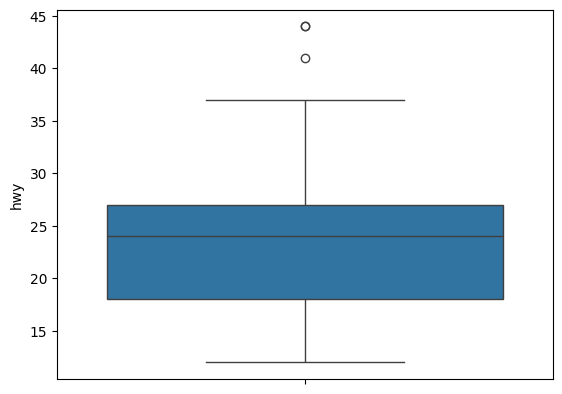

In [39]:
# mpg 데이터의 hwy 변수로 상자 그림 만들기 -> seaborn 패키지의 boxplot()
mpg = pd.read_csv('data/mpg.csv')

import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

### 극단치 기준값 구하기
1. 1사분위수, 3사분위수 구하기 -> df.quantile() -> 분위수 구할 수 있음
2. IQR(inter quartile range, 사분위 범위) 구하기 -> 1사분위수와 3사분위수의 거리를 나타냄
3. 하한, 상한 구하기
  - 하한 : 1사분위수보다 iqr의 1.5배만큼 더 작은 값
  - 상한 : 3사분위수보다 iqr의 1.5배만큼 더 큰 값

In [41]:
# 1
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [42]:
# 1
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [43]:
# 2
iqr = pct75 - pct25
iqr

9.0

In [44]:
# 3
pct25 - 1.5 * iqr

4.5

In [45]:
# 3
pct75 - 1.5 * iqr

13.5

### 극단치를 결측 처리하기
- 정한 극단치 기준값을 통해 np.where()을 이용해 기준값을 벗어나면 결측 처리하기

In [47]:
# 4.5~40.5 벗어나면 NaN 부여
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5), np.nan, mpg['hwy'])

# 결측치 빈도 확인
mpg['hwy'].isna().sum()

3

### 결측치 제거하고 분석하기

In [48]:
mpg.dropna(subset =['hwy'])\
  .groupby('drv')\
  .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


### 혼자서 해보기

In [49]:
# mpg 데이터를 불러와 이상치 생성 -> drv에 존재할 수 없는 값 k 할당
# cty 변수도 행에 극단적으로 크거나 작은 값 할당

mpg = pd.read_csv('data/mpg.csv')

mpg.loc[[9,13,57,92],'drv'] = 'k'

mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42]

In [53]:
# drv 변수에 이상치 있는지 확인하기

mpg['drv'].value_counts().sort_index()

drv
4    100
f    106
k      4
r     24
Name: count, dtype: int64

In [56]:
# 이상치를 결측 처리한 다음 이상치 확인하기
mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']), mpg['drv'], np.nan)

<Axes: ylabel='cty'>

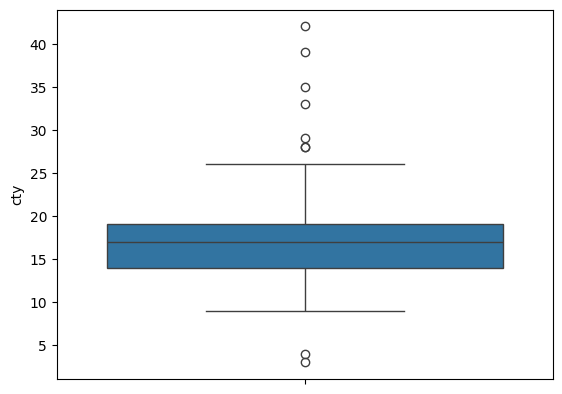

In [57]:
# 상자 그림을 이용해 cty에 이상치가 있는지 확인
sns.boxplot(data = mpg, y = 'cty')

In [58]:
pct25 = mpg['cty'].quantile(.25)
pct75 = mpg['cty'].quantile(.75)
iqr = pct75 - pct25

In [59]:
pct25 - 1.5 * iqr # 하한, iqr보다 1.5배만큼 작은 값

6.5

In [60]:
pct75 + 1.5 * iqr # 상한

26.5

In [61]:
mpg['cty'] = np.where((mpg['cty'] < 6.5)| (mpg['cty'] > 26.5), np.nan, mpg['cty'])

<Axes: ylabel='cty'>

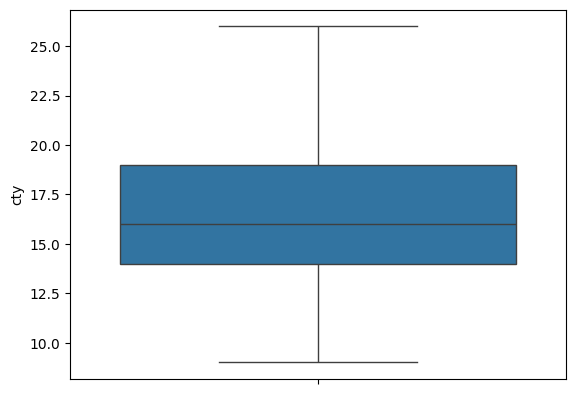

In [62]:
sns.boxplot(data = mpg, y = 'cty')

In [64]:
mpg.dropna(subset = ['drv', 'cty'])\
  .groupby('drv')\
  .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
